In [233]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [234]:
data=pd.read_excel('data_cleaning.xlsx', sheet_name=1, header=0)
df=data.copy()

In [235]:
aylar=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ayliq_qiymet=[0.20, 0.19, 0.17, 0.18, 0.22, 0.27, 0.24, 0.19, 0.18, 0.15, 0.14, 0.19]

In [236]:
saat=['11PM until 12AM', '12AM until 1AM', '1AM until 2AM', '2AM until 3AM', 
      '3AM until 4AM', '4AM until 5AM', '5AM until 6AM','6AM until 7AM', 
      '7AM until 8AM', '8AM until 9AM', '9AM until 10AM', '10AM until 11AM', 
      '11AM until 12PM', '12PM until 1PM', '1PM until 2PM', '2PM until 3PM', 
      '3PM until 4PM', '4PM until 5PM', '5PM until 6PM', '6PM until 7PM', 
      '7PM until 8PM', '8PM until 9PM', '9PM until 10PM', '10PM until 11PM']
saatliq_qiymet=[0.10, 0.10, 0.10, 0.10, 0.10, 0.15, 0.20, 0.24, 0.24, 0.26, 0.20, 0.20,
       0.26, 0.26, 0.20, 0.24, 0.18, 0.15, 0.30, 0.24, 0.24, 0.12, 0.11, 0.10]

<H4>Push header to first row

In [237]:
df.loc[-1] = df.columns.values
df.sort_index(inplace=True)
df.reset_index(drop=True, inplace=True)
df.rename(columns=
    {str(df.columns[0]): "z"}, 
    inplace=True)

<H4>Data cleaning using Regex and input info to the lists.

In [238]:
Time, AM_PM, Weekday, Month, Date, Usage, Unit, time=[], [], [], [], [], [], [], []
for i in range(len(df)): 
    regex=list(re.findall('_*(\d*)\s*(.M)\s*([A-z]*)\s*(\d*)\w*-(\w*)-(\d*)_*(\d*.\d*)\s*(\w*)',str(df.loc[i,'z'].strip()))[0])
    Time.append(regex[0]+" "+regex[1])
    time.append(regex[0])
    AM_PM.append(regex[1])
    Weekday.append(regex[2])
    Month.append(regex[4])
    Date.append(regex[3]+'-'+regex[4]+'-'+regex[5])
    Usage.append(regex[6])
    Unit.append(regex[7])

In [169]:
df=pd.DataFrame({'Time':Time,
   'Weekday':Weekday,
   'Month':Month,
   'Date':Date,
   'Usage':Usage,
   'Unit':Unit,})

<H4>Change column type

In [170]:
df["Usage"] = pd.to_numeric(df["Usage"])
df["Date"] = pd.to_datetime(df["Date"], format='%d-%b-%Y')

<H4>I have imported date from datetime. Aim is to get Weekdays from "Date" column

In [171]:
from datetime import date
w = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Weekday = []
for i in df['Date']:
    Weekday.append(w[i.weekday()])
df['Weekday'] = Weekday

In [172]:
df

,Time,Weekday,Month,Date,Usage,Unit
0,3 PM,Monday,Mar,2014-03-24,0.384,kwh
1,5 AM,Friday,Aug,2014-08-15,1.201,kwh
2,8 PM,Thursday,Mar,2014-03-20,1.523,kwh
3,6 PM,Wednesday,Apr,2014-04-23,0.424,kwh
4,1 AM,Friday,Dec,2014-12-19,0.209,kwh
...,...,...,...,...,...,...
8755,1 AM,Friday,Nov,2014-11-07,0.084,kwh
8756,6 AM,Tuesday,May,2014-05-20,1.027,kwh
8757,2 AM,Tuesday,Apr,2014-04-08,0.052,kwh
8758,9 PM,Monday,Jan,2014-01-27,1.428,kwh


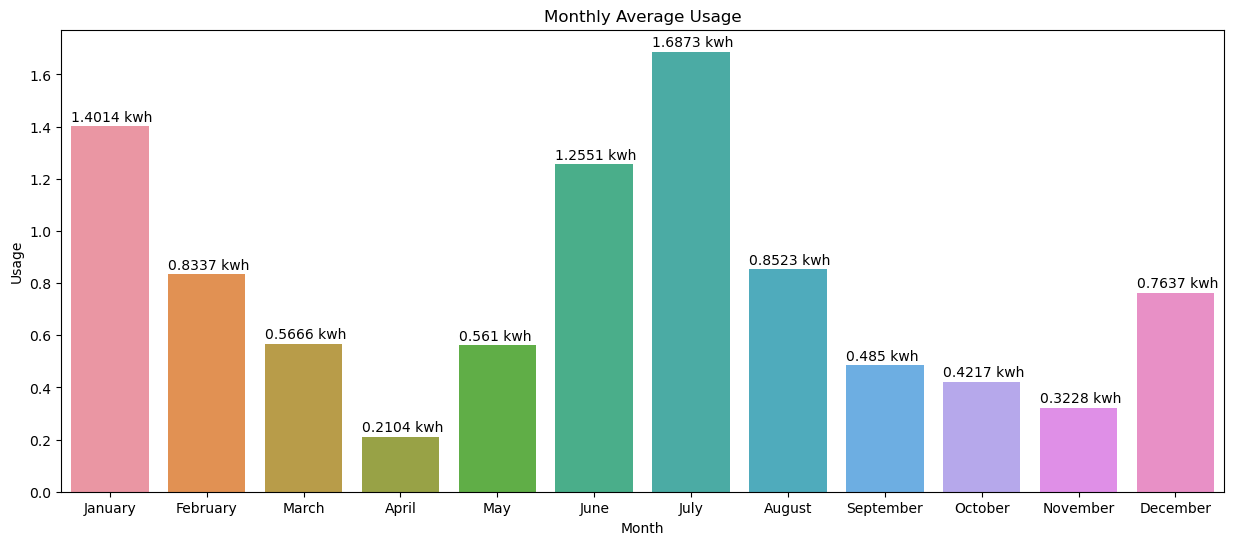

In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# group the data by month and calculate the mean usage
df_mean = df.groupby(pd.PeriodIndex(df['Date'], freq="M")).mean().reset_index()
df_mean['Date'] = month

# create the figure and axis objects
fig, ax = plt.subplots(figsize=(15, 6))

# create the bar plot
sns.barplot(x='Date', y='Usage', data=df_mean, ax=ax)

# add text labels for the bar heights
for i, v in enumerate(df_mean['Usage']):
    ax.text(i - 0.4, v + 0.02, str(round(v, 4)) + ' kwh')

# set the x-axis and y-axis labels
ax.set_xlabel('Month')
ax.set_ylabel('Usage')

# set the plot title
ax.set_title('Monthly Average Usage')

# display the plot
plt.show()


<H1>No Flex
<H6>Price=0.21 $

In [216]:
df_monthly_total = df.groupby(pd.PeriodIndex(df['Date'], freq='M'))['Usage'].sum()

# calculate the annual cost at a fixed price of electricity
fixed_price = 0.21
annual_cost = df_monthly_total.sum() * fixed_price

# print the result
print(f'Annual cost at a fixed price of electricity: {annual_cost:.2f} $')

Annual cost at a fixed price of electricity: 1438.10 $


<H3>Ayliq tarif

<H4>Group by Month

In [175]:
df_sum = df.groupby(pd.PeriodIndex(df['Date'], freq="M")).sum().reset_index()

<H4>Aylari ve qiymet

In [176]:
df_sum['Aylar'] = aylar
df_sum['Qiymet'] = ayliq_qiymet

In [177]:
df_sum

,Date,Usage,Aylar,Qiymet
0,2014-01,1042.660,January,0.20
1,2014-02,559.436,February,0.19
2,2014-03,422.655,March,0.17
3,2014-04,151.666,April,0.18
4,2014-05,416.813,May,0.22
5,2014-06,899.904,June,0.27
6,2014-07,1255.351,July,0.24
7,2014-08,635.819,August,0.19
8,2014-09,348.723,September,0.18
9,2014-10,313.719,October,0.15


In [218]:
print('Annual cost at a Monthly Flex of electricity: ',(df_sum['Qiymet'] * df_sum['Usage']).sum(),'$')

Annual cost at a Monthly Flex of electricity:  1421.20577 $


<H1>Saatliq Tarif

In [179]:
df_sum_hour = df.groupby(pd.PeriodIndex(df['Time'], freq = "h")).sum().reset_index()

In [180]:
df_sum_hour['Saat']=saat
df_sum_hour['Qiymet']=saatliq_qiymet

In [181]:
df_sum_hour

,Time,Usage,Saat,Qiymet
0,0001-01-01 00:00,181.638,11PM until 12AM,0.10
1,0001-01-01 01:00,93.966,12AM until 1AM,0.10
2,0001-01-01 02:00,92.192,1AM until 2AM,0.10
3,0001-01-01 03:00,92.315,2AM until 3AM,0.10
4,0001-01-01 04:00,93.596,3AM until 4AM,0.10
5,0001-01-01 05:00,354.582,4AM until 5AM,0.15
6,0001-01-01 06:00,446.288,5AM until 6AM,0.20
7,0001-01-01 07:00,399.243,6AM until 7AM,0.24
8,0001-01-01 08:00,268.043,7AM until 8AM,0.24
9,0001-01-01 09:00,190.439,8AM until 9AM,0.26


In [200]:
print('Annual cost at a Hourly Flex of electricity: ',(df_sum_hour['Usage'] * df_sum_hour['Qiymet']).sum(),'$')

Annual cost at a Hourly Flex of electricity:  1394.3001399999998 $


<H3>Saul 1
<H6>What is your average hourly electricity usage?

In [201]:
print('Average hourly electricity usage:', round(df.groupby(pd.PeriodIndex(df['Time'], freq = "h")).mean().reset_index()['Usage'].mean(),3), 'kwh' + color.END)

Average hourly electricity usage: 0.782 kwh


<H3>Sual 2
<H6>What is your average electricity usage perhour in February?

In [184]:
avg_usage_feb = df[df['Month'] == 'Feb'].groupby(pd.PeriodIndex(df[df['Month'] == 'Feb']['Time'], freq = "h")).mean().reset_index()['Usage'].mean()
print('Average electricity usage  per hour  in  Febral:',
round(avg_usage_feb, 3), 'kwh')

Average electricity usage  per hour  in  Febral: 0.833 kwh


<H3>Sual 3
<H6>Which day of the week has the highest average usage?

In [185]:
df_weekly = df.groupby(df['Weekday']).mean().reset_index()

In [186]:
df_weekly

,Weekday,Usage
0,Friday,0.753666
1,Monday,0.725894
2,Saturday,0.890300
3,Sunday,0.898601
4,Thursday,0.746375
5,Tuesday,0.724843
6,Wednesday,0.733699


In [187]:
df_weekly[df_weekly['Usage'] == df_weekly['Usage'].max()]

,Weekday,Usage
3,Sunday,0.898601


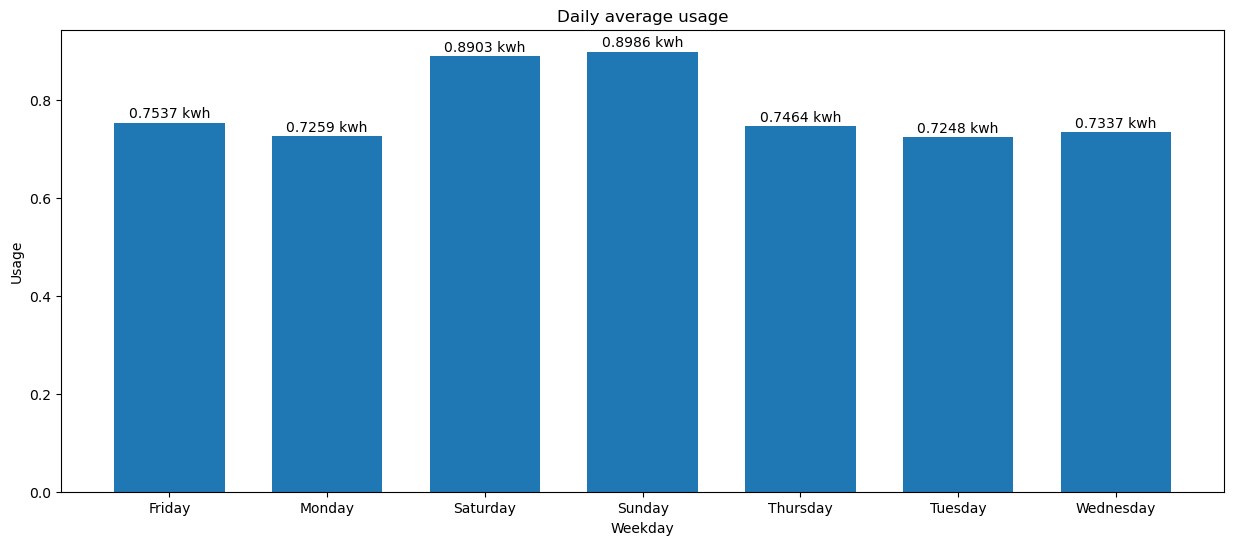

In [221]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.bar(df_weekly['Weekday'], df_weekly['Usage'], width=0.7)
plt.xlabel('Weekday')
plt.ylabel('Usage')
plt.title('Daily average usage')

for i, v in enumerate(df_weekly['Usage']):
    plt.text(i, v + 0.01, str(round(v, 4)) + ' kwh', ha='center')


In [222]:
print('Answer: Sunday has the highest average usage.')

Answer: Sunday has the highest average usage.


<H3>Sual 4
<H6>What is the highest amount of electricity used in a continuous 4 hour period?

In [223]:
sorted_df = df.drop('Time', axis = 1)
sorted_df['Time'] = time
sorted_df['AM/PM'] = AM_PM

In [224]:

sorted_df = sorted_df.sort_values(by = ["Date",'AM/PM', "Time"], ascending = True)

In [225]:
sorted_df

,Weekday,Month,Date,Usage,Unit,Time,AM/PM
6316,Wednesday,Jan,2014-01-01,0.340,kwh,1,AM
5987,Wednesday,Jan,2014-01-01,0.952,kwh,10,AM
4591,Wednesday,Jan,2014-01-01,0.830,kwh,11,AM
8425,Wednesday,Jan,2014-01-01,0.684,kwh,12,AM
5068,Wednesday,Jan,2014-01-01,0.332,kwh,2,AM
...,...,...,...,...,...,...,...
6339,Wednesday,Dec,2014-12-31,1.544,kwh,5,PM
2993,Wednesday,Dec,2014-12-31,1.448,kwh,6,PM
7408,Wednesday,Dec,2014-12-31,1.940,kwh,7,PM
7959,Wednesday,Dec,2014-12-31,1.901,kwh,8,PM


In [226]:
#filter edirik july cixartmaq ucun
jul = sorted_df[sorted_df['Month'] == 'Jul']
jul.reset_index(inplace = True, drop = True)

In [227]:
jul

,Weekday,Month,Date,Usage,Unit,Time,AM/PM
0,Tuesday,Jul,2014-07-01,0.475,kwh,1,AM
1,Tuesday,Jul,2014-07-01,0.778,kwh,10,AM
2,Tuesday,Jul,2014-07-01,1.020,kwh,11,AM
3,Tuesday,Jul,2014-07-01,0.857,kwh,12,AM
4,Tuesday,Jul,2014-07-01,0.403,kwh,2,AM
...,...,...,...,...,...,...,...
739,Thursday,Jul,2014-07-31,2.777,kwh,5,PM
740,Thursday,Jul,2014-07-31,3.494,kwh,6,PM
741,Thursday,Jul,2014-07-31,3.974,kwh,7,PM
742,Thursday,Jul,2014-07-31,3.110,kwh,8,PM


In [228]:
sum_4_usages = []
for i in range(len(jul)):
    sum_4_usages.append(jul.iloc[i:i+4]['Usage'].sum())

In [229]:
#
print('The highest amount of electricity use in a continuous 4 hour period happened in July and is', round(max(sum_4_usages), 3), 'kwh' )

The highest amount of electricity use in a continuous 4 hour period happened in July and is 17.237 kwh


<H3>Sual 5
<H6>Based on your historic electricity usage, what would your annual cost of electricitybe under the "Monthly Flex" contract?

In [230]:
print('Annual cost at a Monthly Flex of electricity: ', (df_sum['Qiymet'] * df_sum['Usage']).sum(), '$')

Annual cost at a Monthly Flex of electricity:  1421.20577 $


<H3>Sual 6
<H6>Based on your historic electricity usage, which of the three contracts would produce the lowest annual cost?

In [231]:
print('Annual cost at a Fixed Price of electricity: ',df.groupby(pd.PeriodIndex(df['Date'], freq = "M")).sum().sum()[0] * 0.21, '$' + color.END)
print('Annual cost at a Monthly Flex of electricity:',(df_sum['Qiymet'] * df_sum['Usage']).sum(),'$' + color.END)
print('Annual cost at a Hourly Flex of electricity:', round((df_sum_hour['Usage'] * df_sum_hour['Qiymet']).sum(),5),'$' + color.END)
print('Answer is Hourly Flex' )

Annual cost at a Fixed Price of electricity:  1438.10394 $
Annual cost at a Monthly Flex of electricity: 1421.20577 $
Annual cost at a Hourly Flex of electricity: 1394.30014 $
Answer is Hourly Flex
